# Untersuchung von Ruß und Stickoxiden

## Datenaufbereitung

In [1]:
### Package import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, MinuteLocator, DateFormatter, WeekdayLocator
from scipy.stats import linregress

In [2]:
### file import, time formating, indexing

blackcarbon_data = 'blackcarbon.csv'
df_blackcarbon = pd.read_csv(blackcarbon_data, encoding =  "ISO-8859-1", sep=',')
df_blackcarbon['Datum Zeit [Ende des 5 min-Intervalls MESZ]'] = pd.to_datetime(df_blackcarbon['Datum Zeit [Ende des 5 min-Intervalls MESZ]'], format = '%d.%m.%Y %H:%M')
df_blackcarbon = df_blackcarbon.set_index('Datum Zeit [Ende des 5 min-Intervalls MESZ]')
df_blackcarbon.loc['2024-06-15 02:55:00','BC_IR [ng/m3]'] = '505' # Bei 2024-06-15 02:55:00 gibt es einen #DIV/0! - Wert. Da dies nur ein einziger Wert ist, korrigieren wir ihn manuell damit er keine Bugs verursacht
df_blackcarbon = df_blackcarbon.astype({'BC_IR [ng/m3]': 'float64'})

nox_data = 'spurengase.csv'
df_nox = pd.read_csv(nox_data, encoding =  "ISO-8859-1", sep=',')
df_nox['Datum Zeit [Ende des 5 min-Intervalls MESZ]'] = pd.to_datetime(df_nox['Datum Zeit [Ende des 5 min-Intervalls MESZ]'], format = '%d.%m.%Y %H:%M')
df_nox = df_nox.set_index('Datum Zeit [Ende des 5 min-Intervalls MESZ]')
df_nox = df_nox.iloc[:,0:2] # Wir brauchen nur die Stickoxid- Spalten

In [3]:
### Die Daten auf die Schnittmengenzeit eingrenzen - d.h. 31.05.2024 13:50 bis 19.06.2024 12:30
filt_blackcarbon = (df_blackcarbon.index >= '2024-05-31 13:50:00') & (df_blackcarbon.index <= '2024-06-19 12:30:00')
df_blackcarbon = df_blackcarbon.loc[filt_blackcarbon]

filt_nox = (df_nox.index >= '2024-05-31 13:50:00') & (df_nox.index <= '2024-06-19 12:30:00')
df_nox = df_nox.loc[filt_nox]

df_airpollutants = pd.concat([df_blackcarbon,df_nox], axis = 1)

In [4]:
### Da ein 5-Minuten-Takt ein zu kleiner Zeitraum ist, versuchen wir, über bestimmte Zeiträume Durchschnittswerte zu nehmen.
"""
##Stündlich
df_blackcarbon_H = df_blackcarbon.resample('h').mean()
df_nox_H = df_nox.resample('h').mean()

##Täglich
df_blackcarbon_D = df_blackcarbon.resample('D').mean()
df_nox_D = df_nox.resample('D').mean()
"""
df_airpollutants_H = df_airpollutants.resample('h').mean()
df_airpollutants_D = df_airpollutants.resample('D').mean()

## Plots

<function matplotlib.pyplot.show(close=None, block=None)>

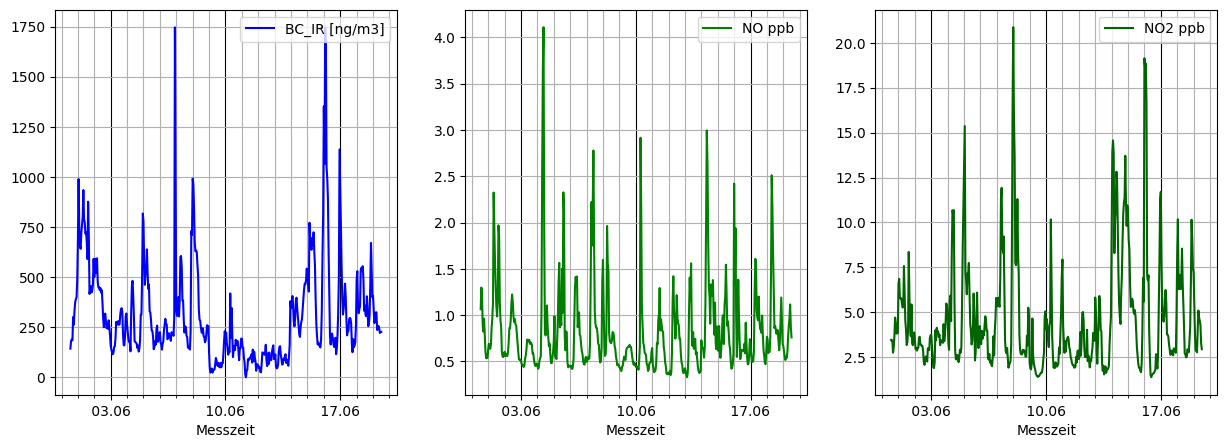

In [5]:
### Plots als Stundenmittel

fig_sidebyside_H, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(df_airpollutants_H['BC_IR [ng/m3]'], color = 'b', label='BC_IR [ng/m3]')
ax[0].set_xlabel('Messzeit')
ax[0].legend()
ax[0].xaxis.set_major_locator(WeekdayLocator(byweekday=0))
ax[0].xaxis.set_minor_locator(WeekdayLocator(byweekday=[0,1,2,3,4,5,6]))
ax[0].xaxis.set_major_formatter(DateFormatter(" %d.%m "))
ax[0].xaxis.grid(True,which='major', color = 'black')
ax[0].xaxis.grid(True,which='minor')
ax[0].yaxis.grid(True)

ax[1].plot(df_airpollutants_H['NO ppb'], color = 'green', label='NO ppb')
ax[1].set_xlabel('Messzeit')
ax[1].legend()
ax[1].xaxis.set_major_locator(WeekdayLocator(byweekday=0))
ax[1].xaxis.set_minor_locator(WeekdayLocator(byweekday=[0,1,2,3,4,5,6]))
ax[1].xaxis.set_major_formatter(DateFormatter(" %d.%m "))
ax[1].xaxis.grid(True,which='major', color = 'black')
ax[1].xaxis.grid(True,which='minor')
ax[1].yaxis.grid(True)

ax[2].plot(df_airpollutants_H['NO2 ppb'], color = 'darkgreen', label='NO2 ppb')
ax[2].set_xlabel('Messzeit')
ax[2].legend()
ax[2].xaxis.set_major_locator(WeekdayLocator(byweekday=0))
ax[2].xaxis.set_minor_locator(WeekdayLocator(byweekday=[0,1,2,3,4,5,6]))
ax[2].xaxis.set_major_formatter(DateFormatter(" %d.%m "))
ax[2].xaxis.grid(True,which='major', color = 'black')
ax[2].xaxis.grid(True,which='minor')
ax[2].yaxis.grid(True)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

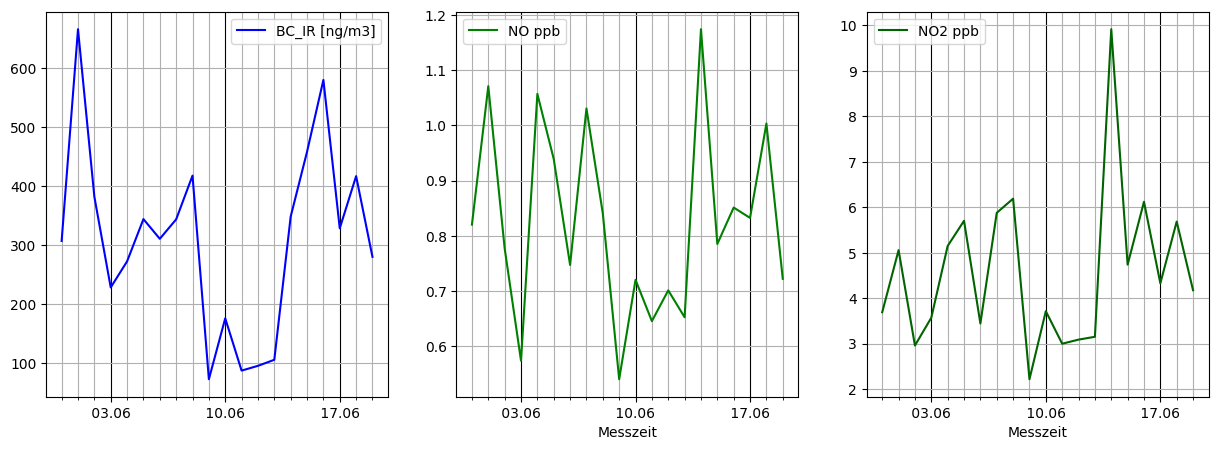

In [6]:
### Plots als Tagesmittel

fig_sidebyside_D, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(df_airpollutants_D['BC_IR [ng/m3]'], color = 'b', label='BC_IR [ng/m3]')
ax[0].legend()
ax[0].xaxis.set_major_locator(WeekdayLocator(byweekday=0))
ax[0].xaxis.set_minor_locator(WeekdayLocator(byweekday=[0,1,2,3,4,5,6]))
ax[0].xaxis.set_major_formatter(DateFormatter(" %d.%m "))
ax[0].xaxis.grid(True,which='major', color = 'black')
ax[0].xaxis.grid(True,which='minor')
ax[0].yaxis.grid(True)

ax[1].plot(df_airpollutants_D['NO ppb'], color = 'green', label='NO ppb')
ax[1].set_xlabel('Messzeit')
ax[1].legend()
ax[1].xaxis.set_major_locator(WeekdayLocator(byweekday=0))
ax[1].xaxis.set_minor_locator(WeekdayLocator(byweekday=[0,1,2,3,4,5,6]))
ax[1].xaxis.set_major_formatter(DateFormatter(" %d.%m "))
ax[1].xaxis.grid(True,which='major', color = 'black')
ax[1].xaxis.grid(True,which='minor')
ax[1].yaxis.grid(True)

ax[2].plot(df_airpollutants_D['NO2 ppb'], color = 'darkgreen', label='NO2 ppb')
ax[2].set_xlabel('Messzeit')
ax[2].legend()
ax[2].xaxis.set_major_locator(WeekdayLocator(byweekday=0))
ax[2].xaxis.set_minor_locator(WeekdayLocator(byweekday=[0,1,2,3,4,5,6]))
ax[2].xaxis.set_major_formatter(DateFormatter(" %d.%m "))
ax[2].xaxis.grid(True,which='major', color = 'black')
ax[2].xaxis.grid(True,which='minor')
ax[2].yaxis.grid(True)

plt.show

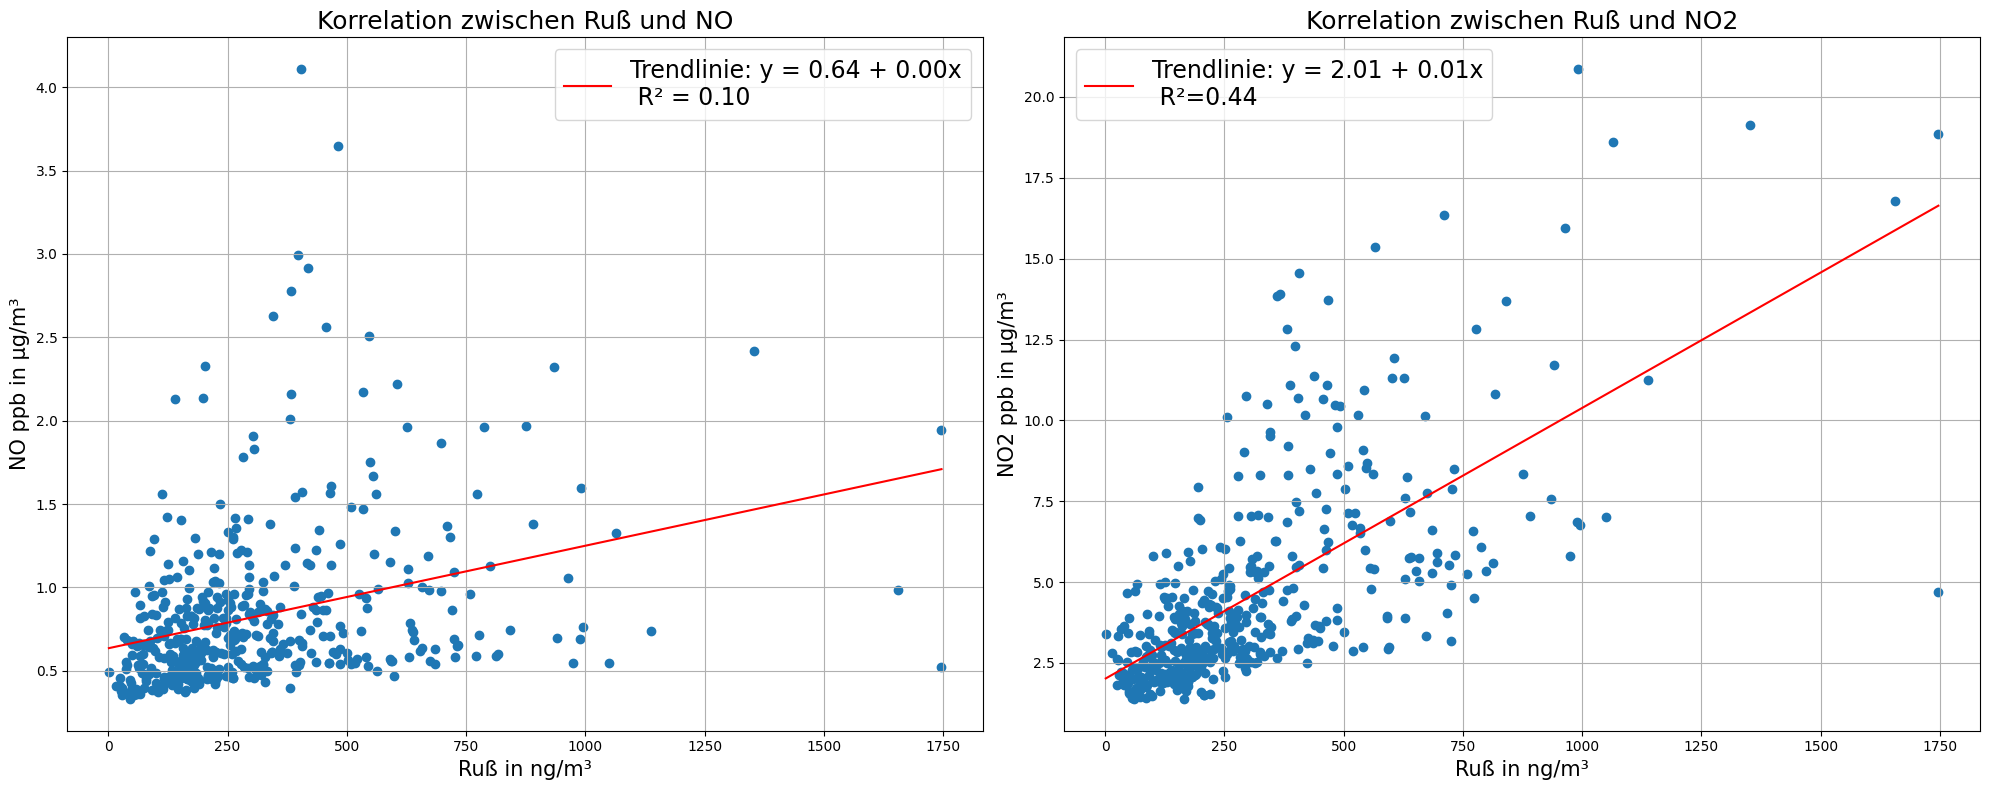

In [7]:
### Scatterplot mit Regressionsgerade erstellen Plots
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Ruß und NO
ax[0].scatter(df_airpollutants_H['BC_IR [ng/m3]'], df_airpollutants_H['NO ppb'])
ax[0].set_xlabel('Ruß in ng/m³', fontsize = 15)
ax[0].set_ylabel('NO ppb in µg/m³', fontsize = 15)
ax[0].title.set_text('Korrelation zwischen Ruß und NO')
ax[0].title.set_fontsize(18)
ax[0].grid(True)

# Ruß und NO2
ax[1].scatter(df_airpollutants_H['BC_IR [ng/m3]'], df_airpollutants_H['NO2 ppb'])
ax[1].set_xlabel('Ruß in ng/m³', fontsize = 15)
ax[1].set_ylabel('NO2 ppb in µg/m³', fontsize = 15)
ax[1].title.set_text('Korrelation zwischen Ruß und NO2')
ax[1].title.set_fontsize(18)
ax[1].grid(True)

#Hinzufügen der Trendlinie zu Subplot 1

#1. # Lineare Regression berechnen
slope, intercept, r_value, p_value, std_err = linregress(df_airpollutants_H['BC_IR [ng/m3]'], df_airpollutants_H['NO ppb'])

# Regressionslinie hinzufügen
x_vals = np.linspace(df_airpollutants_H['BC_IR [ng/m3]'].min(), df_airpollutants_H['BC_IR [ng/m3]'].max(), 100)
y_vals = intercept + slope * x_vals

# Bestimmtheitsmaß (R²) berechnen
r_squared = r_value**2

#Legende
ax[0].plot(x_vals, y_vals, color = 'red', label = f'Trendlinie: y = {intercept:.2f} + {slope:.2f}x\n R² = {r_squared:.2f}')
ax[0].legend(fontsize = 17) 

#Hinzufügen der Trendlinie zu Subplot 2

#1. # Lineare Regression berechnen
slope, intercept, r_value, p_value, std_err = linregress(df_airpollutants_H['BC_IR [ng/m3]'], df_airpollutants_H['NO2 ppb'])

# Regressionslinie hinzufügen
x_vals = np.linspace(df_airpollutants_H['BC_IR [ng/m3]'].min(), df_airpollutants_H['BC_IR [ng/m3]'].max(), 100)
y_vals = intercept + slope * x_vals
#ax[1].plot(x_vals, y_vals, color = 'red', label = f'Trendlinie: y = {intercept:.2f} + {slope:.2f}x')

# Bestimmtheitsmaß (R²) berechnen
r_squared = r_value**2

#Lagende
ax[1].plot(x_vals, y_vals, color='red', label=f'Trendlinie: y = {intercept:.2f} + {slope:.2f}x\n R²={r_squared:.2f}')
ax[1].legend(fontsize = 17) 

# Show plots
plt.tight_layout()
plt.show()

In [16]:
#Erstelle ein Dataframe für die durchschnittliche Konzentration über Tageszeiten

df_airpollutants_H['Tageszeit'] = df_airpollutants_H.index.strftime('%H:%M') # temp- Spalte, die später wieder gelöscht wird.

df_daytime = pd.DataFrame()
col_blackcarbon = df_airpollutants_H.groupby('Tageszeit')['BC_IR [ng/m3]'].mean()
col_no = df_airpollutants_H.groupby('Tageszeit')['NO ppb'].mean()
col_no2 = df_airpollutants_H.groupby('Tageszeit')['NO2 ppb'].mean()
df_daytime['BC_IR [ng/m3]'],df_daytime['NO [ppb]'],df_daytime['NO2 [ppb]'] = col_blackcarbon, col_no, col_no2

df_airpollutants_H.drop('Tageszeit', axis = 1, inplace = True)

,BC_IR [ng/m3],NO [ppb],NO2 [ppb]
Tageszeit,,,
00:00,453.907895,0.725877,7.898026
01:00,423.521930,0.618684,7.355000
02:00,400.004386,0.607939,6.232193
03:00,386.600877,0.525044,5.506711
04:00,340.903509,0.505000,4.849605
05:00,344.328947,0.614430,5.083684
06:00,372.697368,0.991667,6.107544
07:00,394.706140,1.443421,6.513158
08:00,377.442982,1.505526,5.675877


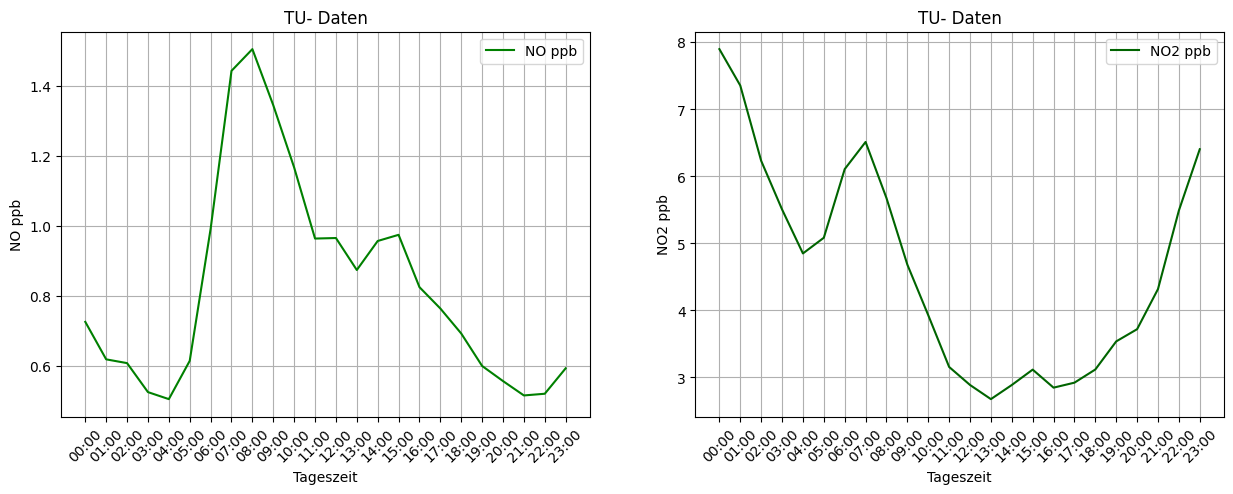

In [9]:
### Plots als Stundenmittel

fig_sidebyside_daytime, ax = plt.subplots(1,2,figsize=(15,5))

#NO
ax[0].plot(df_daytime['NO ppb'], color = 'green', label='NO ppb')
ax[0].set_xlabel('Tageszeit')
ax[0].set_ylabel('NO ppb')
ax[0].legend()
ax[0].xaxis.set_major_locator(HourLocator(byhour = 0))
ax[0].set_xticks(df_daytime.index,df_daytime.index,rotation=45)
ax[0].set_title('TU- Daten')
ax[0].xaxis.grid(True)
ax[0].yaxis.grid(True)

#NO2
ax[1].plot(df_daytime['NO2 ppb'], color = 'darkgreen', label='NO2 ppb')
ax[1].set_xlabel('Tageszeit')
ax[1].set_ylabel('NO2 ppb')
ax[1].legend()
ax[1].xaxis.set_major_locator(HourLocator(byhour = 0))
ax[1].set_xticks(df_daytime.index,df_daytime.index,rotation=45)
ax[1].set_title('TU- Daten')
ax[1].xaxis.grid(True)
ax[1].yaxis.grid(True)
"""
#Ruß
ax[2].plot(df_daytime['BC_IR [ng/m3]'], color = 'b', label='BC_IR [ng/m3]')
ax[2].set_xlabel('Tageszeit')
ax[2].set_ylabel('BC_IR [ng/m³]')
ax[2].legend()
ax[2].xaxis.set_major_locator(WeekdayLocator(byweekday = 0))
ax[2].set_xticks(df_daytime.index,df_daytime.index,rotation=90)
"""
plt.show()

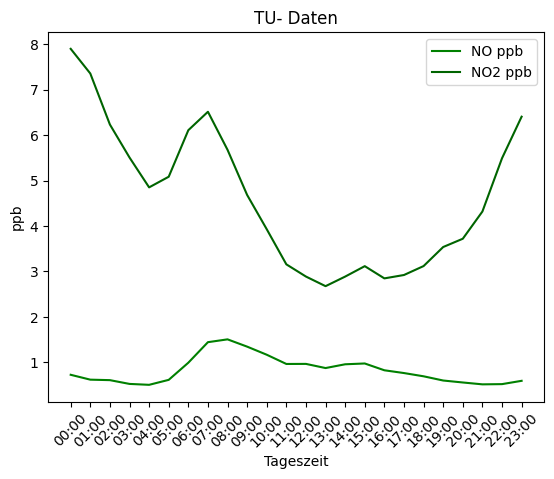

In [10]:
plt.plot(df_daytime['NO ppb'], color = 'green', label='NO ppb')
plt.plot(df_daytime['NO2 ppb'], color = 'darkgreen', label='NO2 ppb')
plt.xlabel('Tageszeit')
plt.ylabel('ppb')
plt.xticks(rotation=45)
plt.title('TU- Daten')
plt.legend()

## Numerische Untersuchung

In [11]:
### Zähle alle Instanzen, die einen negativen Wert haben, und ihren Durchschnitt
df_airpollutants[df_airpollutants['BC_IR [ng/m3]'] < 0].count(), df_airpollutants[df_airpollutants['BC_IR [ng/m3]'] < 0].mean()

(BC_IR [ng/m3]    57
 NO ppb           57
 NO2 ppb          57
 dtype: int64,
 BC_IR [ng/m3]   -17.789474
 NO ppb            0.485439
 NO2 ppb           2.457018
 dtype: float64)

In [12]:
### Durchschnittliche Konzentration:
df_daytime['NO ppb'].mean(),df_daytime['NO2 ppb'].mean()

(np.float64(0.8271856725146197), np.float64(4.621238251879699))

## Für den Import zum Notebook 'VisProject'

In [13]:
### Bestimmtheitsmaß zwischen NO und NO2
df_for_import_to_VisProject = df_daytime.copy()
df_for_import_to_VisProject['NO2 ppb'] = df_daytime['NO2 ppb']
df_for_import_to_VisProject.to_csv('Dataframe from Abschlussprojekt for import to VisProject.csv')